In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [260]:
# Importing dataset and separating labels
train_data = pd.read_csv("D:\ML\Datasets\emails.csv")
y_train = train_data['spam']
train_data.drop(labels='spam', axis=1, inplace=True)

In [261]:
# Creating bag of words
vectorizer = CountVectorizer(max_features=500, stop_words=['subject'])
                             #, strip_accents="unicode")
X = vectorizer.fit_transform(train_data.text)
features = vectorizer.get_feature_names() # to check feature names if required
X_train = X.toarray()

In [262]:
# Splitting the dataset
state = 12
train_size = 0.6
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train, random_state=state) # stratify=y_train preserves spam to ham ratio, might not be needed

In [263]:
# Building trees
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=8, random_state=0, verbose=1) # can specify loss function
gb_clf.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

      Iter       Train Loss   Remaining Time 
         1           1.0500            0.49s
         2           1.0199            0.54s
         3           0.9866            0.71s
         4           0.9495            0.89s
         5           0.9111            0.83s
         6           0.8794            0.80s
         7           0.8603            0.74s
         8           0.8288            0.70s
         9           0.8069            0.67s
        10           0.7859            0.66s
        20           0.6287            0.51s
        30           0.4879            0.43s
        40           0.3912            0.35s
        50           0.3357            0.29s
        60           0.2916            0.23s
        70           0.2569            0.17s
        80           0.2231            0.11s
        90           0.2012            0.05s
       100           0.1799            0.00s
Accuracy score (training): 0.992
Accuracy score (validation): 0.967


In [264]:
# Testing trees
predictions = gb_clf.predict(X_val)
print('Confusion Matrix:') # printing confusion matrix using test values of Y and the predictive value of y
print(confusion_matrix(y_val, predictions))

Confusion Matrix:
[[1727   18]
 [  58  489]]


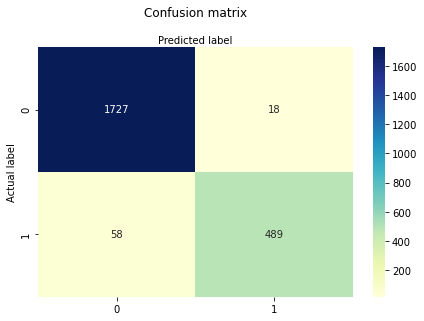

In [265]:
# Printing confusion matrix in the colored format seen below in output
cm = confusion_matrix(y_val, predictions)
cm
class_names=[0, 1] # names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [266]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_val, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1745
           1       0.96      0.89      0.93       547

    accuracy                           0.97      2292
   macro avg       0.97      0.94      0.95      2292
weighted avg       0.97      0.97      0.97      2292



#### Using a diiferent dataset to test the algorithm:

In [267]:
# Testing using a different dataset
test_data = pd.read_csv("D:\ML\Datasets\spam.csv", encoding='Windows-1252')
test_data.v1 = test_data.v1.replace(to_replace=['ham', 'spam'], value =[0, 1])
test_data.drop(test_data.columns[-3:], axis=1, inplace=True)

y_test = test_data['v1']
test_data.drop(labels='v1', axis=1, inplace=True)

X_test = vectorizer.fit_transform(test_data.v2)
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_new, y_new)))

Accuracy score (validation): 0.717


In [268]:
# Testing trees
predictions = gb_clf.predict(X_test)
print('Confusion Matrix:') # printing confusion matrix using test values of Y and the predictive value of y
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[3889  936]
 [ 641  106]]


In [269]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      4825
           1       0.10      0.14      0.12       747

    accuracy                           0.72      5572
   macro avg       0.48      0.47      0.47      5572
weighted avg       0.76      0.72      0.74      5572

